In [11]:
%pip install tensorflow-gpu==2.10.0


  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.2
    Uninstalling protobuf-5.28.2:
      Successfully uninstalled protobuf-5.28.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.38.0 requires protobuf<6,>=3.20, but you have protobuf 3.19.6 which is incompatible.


In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Exploratory Data Analysis :

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Path to your dataset
data_directory = 'C:/Users/ishan/OneDrive/Desktop/skin-disease-datasaet/train_set'

# Load and preprocess the dataset
def load_data(data_directory, img_size=(224, 224)):
    X = []
    y = []
    categories = os.listdir(data_directory)
    for category in categories:
        path = os.path.join(data_directory, category)
        label = categories.index(category)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)  # Load image using OpenCV
            img_resized = cv2.resize(img, img_size)  # Resize image
            X.append(img_resized)
            y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y, categories






C:\Users\ishan\AppData\Local\Temp\ipykernel_22776\2501744150.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=y, palette='Set2')


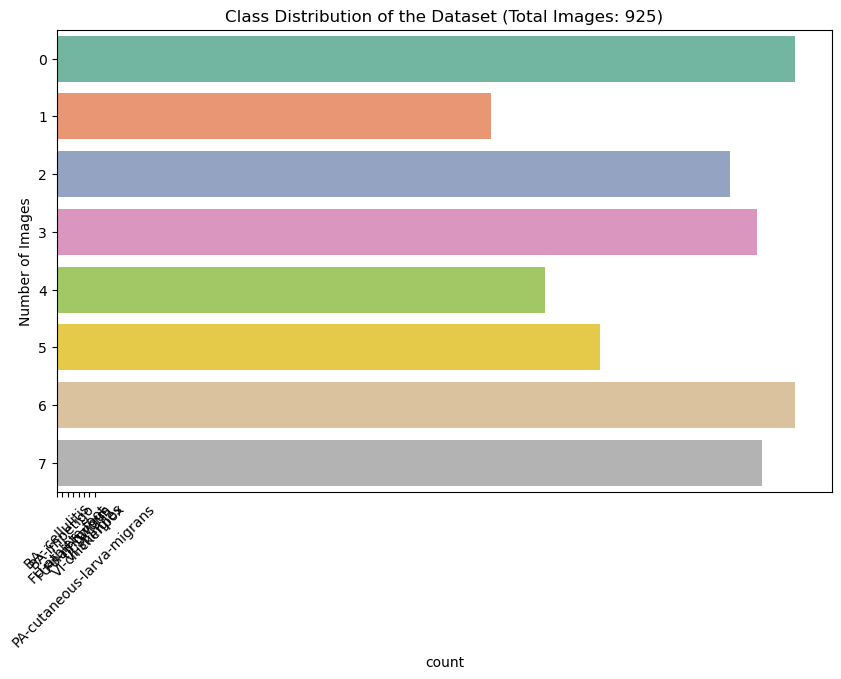

In [13]:
# Load the dataset
X, y, categories = load_data(data_directory)

# 1. Plot class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=y, palette='Set2')

# Add the total number of images to the y-axis label
total_images = len(y)
plt.title(f'Class Distribution of the Dataset (Total Images: {total_images})')
plt.ylabel('Number of Images')
plt.xticks(np.arange(len(categories)), categories, rotation=45)

# Show plot
plt.show()


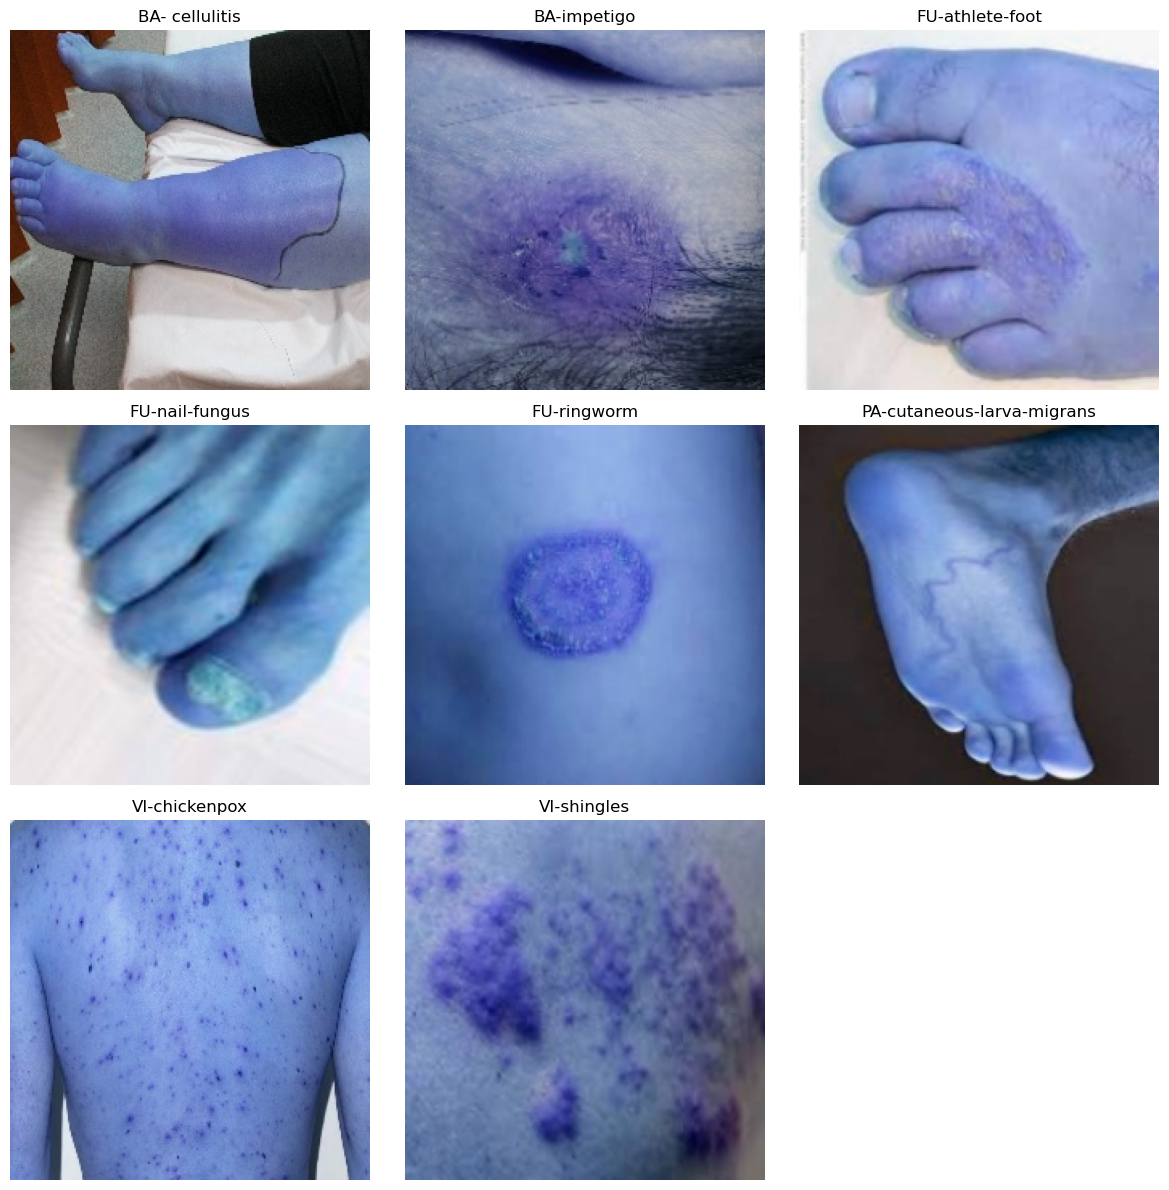

In [14]:
# 2. Display random sample images from each class
def plot_sample_images(X, y, categories):
    plt.figure(figsize=(12, 12))
    for i in range(len(categories)):
        plt.subplot(3, 3, i+1)
        idx = np.where(y == i)[0][0]
        plt.imshow(X[idx])
        plt.title(categories[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to display sample images
plot_sample_images(X, y, categories)

Epoch 1/50
24/24 [==============================] - 19s 447ms/step - loss: 1.9971 - accuracy: 0.2432 - val_loss: 1.6138 - val_accuracy: 0.5459 - lr: 1.0000e-04
Epoch 2/50
24/24 [==============================] - 6s 241ms/step - loss: 1.6886 - accuracy: 0.3568 - val_loss: 1.3627 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 3/50
24/24 [==============================] - 6s 241ms/step - loss: 1.4448 - accuracy: 0.4892 - val_loss: 1.2017 - val_accuracy: 0.6108 - lr: 1.0000e-04
Epoch 4/50
24/24 [==============================] - 6s 240ms/step - loss: 1.2951 - accuracy: 0.5662 - val_loss: 1.0982 - val_accuracy: 0.6216 - lr: 1.0000e-04
Epoch 5/50
24/24 [==============================] - 6s 239ms/step - loss: 1.3071 - accuracy: 0.5554 - val_loss: 1.0330 - val_accuracy: 0.6703 - lr: 1.0000e-04
Epoch 6/50
24/24 [==============================] - 6s 240ms/step - loss: 1.1329 - accuracy: 0.6297 - val_loss: 0.8987 - val_accuracy: 0.7568 - lr: 1.0000e-04
Epoch 7/50
24/24 [===========================

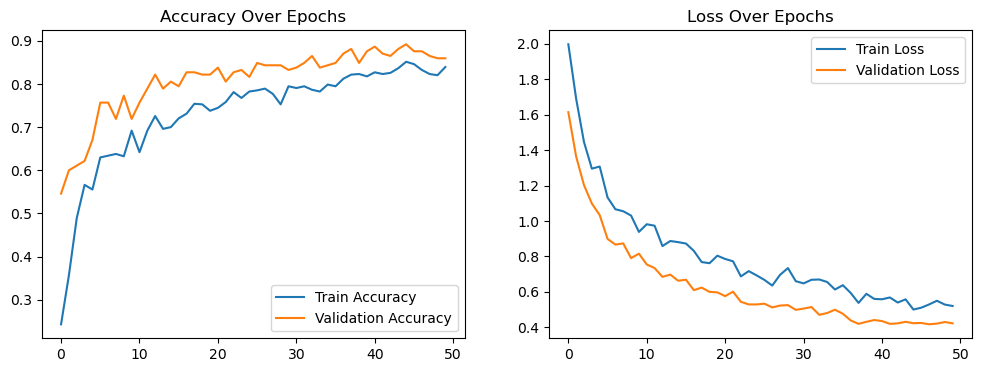

In [2]:
import os
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2 

# Define the path to your local dataset
data_directory = 'C:/Users/ishan/OneDrive/Desktop/skin-disease-datasaet/train_set'  

# Load and preprocess the dataset
def load_data(data_directory, img_size=(224, 224)):
    X = []
    y = []
    categories = os.listdir(data_directory)
    for category in categories:
        path = os.path.join(data_directory, category)
        label = categories.index(category)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)  # Load image using OpenCV
            img_resized = cv2.resize(img, img_size)  # Resize image
            X.append(img_resized)
            y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y, categories

# Load the dataset
X, y, categories = load_data(data_directory)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load VGG16 model with pretrained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[lr_scheduler])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=categories))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


In [3]:
test_data_directory = 'C:/Users/ishan/OneDrive/Desktop/skin-disease-datasaet/test_set'  # Update this path



In [4]:
# Load the test dataset
X_test_new, y_test_new, _ = load_data(test_data_directory)

# Normalize the test data
X_test_new = X_test_new / 255.0


8/8 [==============================] - 3s 411ms/step - loss: 0.4307 - accuracy: 0.8803
Test accuracy on the new test dataset: 0.8803418874740601
8/8 [==============================] - 1s 122ms/step
                            precision    recall  f1-score   support

            BA- cellulitis       0.91      0.91      0.91        34
               BA-impetigo       0.90      0.90      0.90        20
           FU-athlete-foot       0.81      0.94      0.87        32
            FU-nail-fungus       1.00      0.97      0.98        33
               FU-ringworm       0.85      0.74      0.79        23
PA-cutaneous-larva-migrans       0.76      0.64      0.70        25
             VI-chickenpox       0.87      1.00      0.93        34
               VI-shingles       0.90      0.85      0.88        33

                  accuracy                           0.88       234
                 macro avg       0.88      0.87      0.87       234
              weighted avg       0.88      0.88     

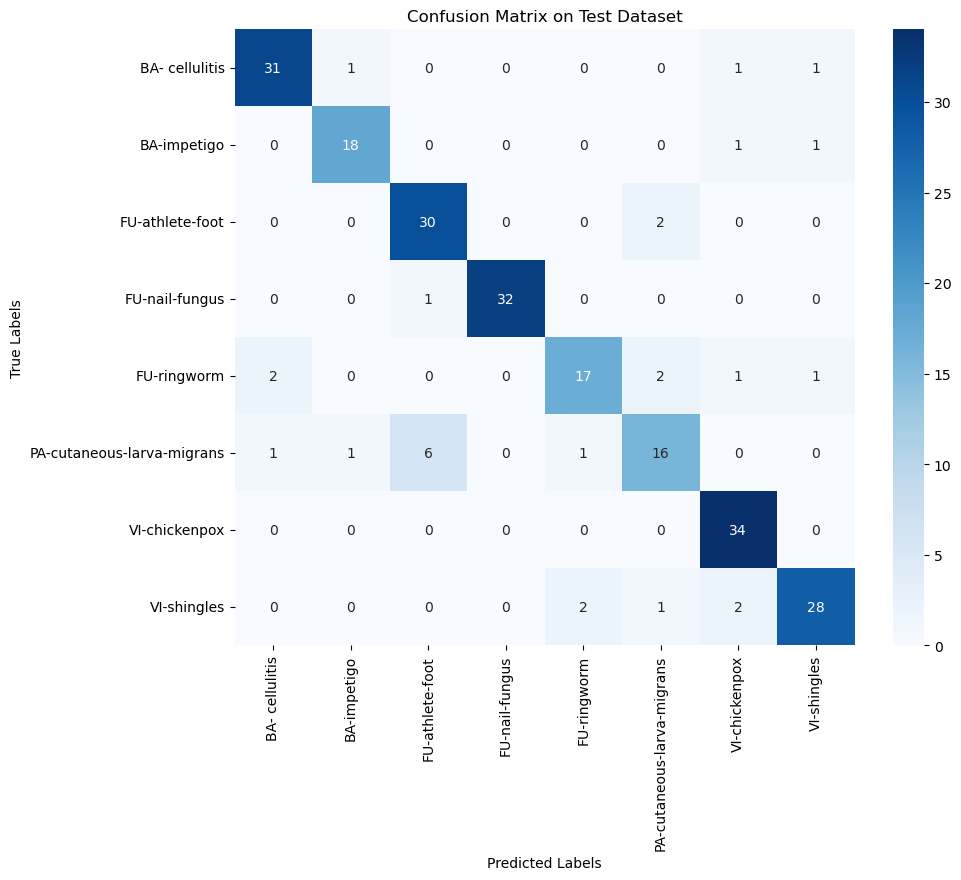

In [5]:
# Evaluate the model on the new test dataset
test_loss_new, test_acc_new = model.evaluate(X_test_new, y_test_new)
print(f"Test accuracy on the new test dataset: {test_acc_new}")

# Generate predictions for the new test dataset
y_pred_new = model.predict(X_test_new)
y_pred_classes_new = np.argmax(y_pred_new, axis=1)

# Print the classification report
print(classification_report(y_test_new, y_pred_classes_new, target_names=categories))

# Generate and print the confusion matrix
conf_matrix_new = confusion_matrix(y_test_new, y_pred_classes_new)
print("Confusion Matrix on new test dataset:")
print(conf_matrix_new)

# Optionally, plot the confusion matrix using matplotlib
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Test Dataset')
plt.show()


Saving model and Frontend

In [22]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20,
                    callbacks=[lr_scheduler])


model.save('skin_disease_classification_model.h5')  

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

#classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=categories))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


NameError: name 'model' is not defined

FRONT END USING STREAMLIT:

In [1]:
%pip install gradio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('skin_disease_classification_model.h5')  # Use the model you already trained in Colab

# Load the updated categories (class names) from your dataset
categories = [
    'BA-cellulitis', 
    'BA-impetigo', 
    'FU-athlete-foot', 
    'FU-nail-fungus', 
    'FU-ringworm', 
    'PA-cutaneous-larva-migrans', 
    'VI-chickenpox', 
    'VI-shingles'
]

# Define image preprocessing function
def preprocess_image(image):
    img_size = (224, 224)
    image = cv2.resize(image, img_size)  # Resize to match input shape
    image = np.array(image) / 255.0      # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Prediction function
def predict_skin_disease(image):
    image = preprocess_image(image)  # Preprocess the input image
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return categories[predicted_class]  # Return the name of the predicted disease

# Create Gradio interface
interface = gr.Interface(
    fn=predict_skin_disease, 
    inputs=gr.Image(type="numpy", label="Upload a skin image"), 
    outputs=gr.Textbox(label="Predicted Skin Disease")
)

# Launch the Gradio interface
interface.launch()


c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Exception in thread Thread-9:
Traceback (most recent call last):
  File "c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\httpx\_transports\default.py", line 72, in map_httpcore_exceptions
    yield
  File "c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\httpx\_transports\default.py", line 236, in handle_request
    resp = self._pool.handle_request(req)
  File "c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\httpcore\_sync\connection_pool.py", line 216, in handle_request
    raise exc from None
  File "c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\httpcore\_sync\connection_pool.py", line 196, in handle_request
    response = connection.handle_request(
  File "c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\httpcore\_sync\connection.py", line 99, in handle_request
    raise exc
  File "c:\Users\ishan\anaconda3\envs\Tensorflow\lib\site-packages\httpcore\_sync\connection.py", line 76, in handle_request
    stream = self._connect(requ

1/1 [==============================] - 0s 32ms/step
